# Homework 2.1 - Introduction to data handling & visualisation

This first notebook will walk through the basics of using Pandas & Matplotlib for data analysis. To begin, be sure to create a new conda environment using the command: ```conda create -n <env_name> Python=3.x```  before installing any of the packages. Once you have created the conda environment, you should be able to select it from the kernel list in the top-right corner.

Most of the functions used in the notebooks will be described with the appropriate comments, but VS Code offers a feature whereby you can hover your cursor over a function and it will describe it's behaviour! I have also created a wiki describing all the functions used in this notebook - see `function-wiki.md`. As a last resort, I advice looking through the difference library documentations found below:

* Pandas : https://pandas.pydata.org/docs/
* Matplotlib : https://matplotlib.org/stable/index.html
* NumPy : https://numpy.org/doc/

In [5]:
# Install packages - ensure you have chosen your correct kernel before running this cell!
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd # Import pandas with alias pd, so it is easier to use and refer to.
import numpy as np # Import numpy with alias np, so it is easier to use and refer to.
import matplotlib # Import whole package of matplotlib in order to get version number. Bad practice, see further below.

In [7]:
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

import matplotlib.pyplot as plt # Import only pyplot from matplotlib. Good practice, this way you know where the function comes from.

Pandas version: 2.0.2
Numpy version: 1.24.3
Matplotlib version: 3.7.4


## Example exploratory data analysis

This section will explore some basic data analysis on a dataset containing order history found in the `data.csv` file. Please note that this dataset is randomly generated and contains no real-world data or personal information.

We will first interrogate the data to uncover trends before plotting informative graphs.

### Data handling with Pandas

As covered in the session, pandas is a powerful Python library primarily used for data manipulation and analysis. It provides data structures and functions needed to manipulate structured data, including functions for reading and writing data in a wide variety of formats. With Pandas, you can filter and sort data, perform statistical analysis, and apply data transformations. It's particularly useful for working with numerical tables or time series data. Use-cases include cleaning data, transforming data, visualising data, and much more.

In [8]:
raw_data = pd.read_csv("data/data.csv") # Read in the data using pandas read_csv function. The data is stored in a pandas DataFrame.

raw_data.head() # Show the first 5 rows of the data.

,order_id,order_cost,deal_category,country,email
0,UXX58VDI7SD,$7.13,2,Nigeria,nec.luctus@yahoo.org
1,NPO10QWN4TG,$30.39,9,France,eleifend.nec.malesuada@aol.net
2,JTK76CIG9CP,$32.94,7,Austria,facilisis.vitae@outlook.com
3,RVG43RZL3IR,$18.41,5,Austria,enim.etiam.imperdiet@yahoo.couk
4,CXQ11AKY1OT,$7.15,0,Ireland,phasellus.ornare.fusce@yahoo.org


In [9]:
raw_data.columns # Show the column names.

Index(['order_id', 'order_cost', 'deal_category', 'country', 'email'], dtype='object')

In [10]:
raw_data['order_id'] # Show the column with the name 'order_id'.

0     UXX58VDI7SD
1     NPO10QWN4TG
2     JTK76CIG9CP
3     RVG43RZL3IR
4     CXQ11AKY1OT
         ...     
95    LTQ72DUF6DY
96    JMI31EBQ9VP
97    YSF25ATX4PE
98    KLS38YMT4EI
99    UWG53CKG5XH
Name: order_id, Length: 100, dtype: object

In [11]:
raw_data.dtypes # Show the data types of each column.

order_id         object
order_cost       object
deal_category     int64
country          object
email            object
dtype: object

In [12]:
# First off, let's convert all the columns to the correct data type.

raw_data_ = raw_data.copy() # Make a copy of the data so we don't overwrite the original.
raw_data_['order_id'] = raw_data['order_id'].apply(lambda x: str(x)) # Convert order_id to string.
raw_data_['order_cost'] = raw_data['order_cost'].apply(lambda x: x[1:]).astype('float64') # Convert order_cost to float, removing the $ sign first using string slicing.
raw_data_['country'] = raw_data['country'].astype('category') # Convert country to category.
raw_data_['email'] = raw_data['email'].apply(lambda x: str(x)) # Convert order_id to string.

raw_data_.dtypes # Check the data types again.

order_id           object
order_cost        float64
deal_category       int64
country          category
email              object
dtype: object

In [13]:
# As is best practice, we should check for missing values as they need to be addressed before we can do any analysis.

raw_data_.replace('nan', np.nan, inplace=True) # Replace all 'nan' strings with np.nan, best practice for handling missing values as lots of pandas functions can handle np.nan.
for col in raw_data_.columns: # Loop through each column.
    print(f"{col}: {raw_data_[col].isna().sum()}") # Check for missing values in each column.

order_id: 0
order_cost: 0
deal_category: 0
country: 0
email: 4


In [14]:
raw_data_.loc[raw_data_['email'].isna(), 'email'] # Check the rows where email is NaN using pd.loc for a conditional selection.

19    NaN
35    NaN
89    NaN
96    NaN
Name: email, dtype: object

In [15]:
raw_data_.iloc[[19, 35, 89, 96]] # Check the rows where email is 'nan' using pd.iloc for index reference.

,order_id,order_cost,deal_category,country,email
19,VNE35PXT8FW,32.65,8,Australia,NaN
35,UJW41QXS3HV,89.21,0,Spain,NaN
89,JDR87KNQ6TI,20.24,2,Belgium,NaN
96,JMI31EBQ9VP,43.63,4,Mexico,NaN


In [16]:
clean_data = raw_data_.drop(index=[19, 35, 89, 96]) # Drop the rows where email is 'nan' using the index reference from above.
clean_data = clean_data.reset_index(drop=True) # Reset the index so it is continuous, with no gaps after dropping rows. We now have a clean dataset.

In [17]:
# Now we have cleaned the data, we can start some basic analysis.

clean_data.describe(include='all') # Show basic some descriptive statistics of the data.

,order_id,order_cost,deal_category,country,email
count,96,96.000000,96.000000,96,96
unique,96,NaN,NaN,34,96
top,UXX58VDI7SD,NaN,NaN,Singapore,nec.luctus@yahoo.org
freq,1,NaN,NaN,8,1
mean,NaN,49.588021,4.895833,NaN,NaN
std,NaN,29.101728,2.739493,NaN,NaN
min,NaN,1.350000,0.000000,NaN,NaN
25%,NaN,25.700000,3.000000,NaN,NaN
50%,NaN,50.705000,5.000000,NaN,NaN
75%,NaN,76.965000,7.000000,NaN,NaN


In [18]:
# Let's find the minimum and maximum order cost.

max_order = clean_data['order_cost'].min() # Find the minimum value in the column
min_order = clean_data['order_cost'].max() # Find the maximum value in the column

print(f"Max order: ${max_order}")
print(f"Min order: ${min_order}")

Max order: $1.35
Min order: $99.37


In [19]:
# Let's find the distrubition of deal categories.

deal_cat_count = clean_data['deal_category'].value_counts() # Count the number of each deal category
print(deal_cat_count) # Print the counts

deal_category
5     14
3     14
9     12
4     10
7      9
8      9
1      9
2      7
6      7
0      4
10     1
Name: count, dtype: int64


In [20]:
# Let's find the average order cost for each deal category.

deal_cat_mean = clean_data.groupby('deal_category')['order_cost'].mean() # Group the data by deal category, then find the mean of order cost for each group
print(deal_cat_mean) # Print the means

deal_category
0     29.220000
1     41.918889
2     26.927143
3     63.802857
4     39.487000
5     47.947857
6     72.037143
7     59.757778
8     43.011111
9     49.198333
10    98.870000
Name: order_cost, dtype: float64


In [21]:
# Let's see each countries single, most common deal category.

grouped_deal_cat = clean_data.groupby('country')['deal_category'] # Group the data by country
country_deal_cat = grouped_deal_cat.apply(lambda x: x.value_counts().index[0]) # Use a lambda function to find the most common deal category for each country

print(country_deal_cat) # Print the most common deal category for each country

country
Australia             3
Austria               7
Belgium               4
Brazil                7
Canada                4
Chile                 3
China                 9
Colombia              3
Costa Rica            2
France                9
Germany               1
India                 9
Indonesia             7
Ireland               0
Italy                 8
Mexico                1
Netherlands           5
New Zealand           2
Nigeria               2
Norway                5
Pakistan              4
Philippines           5
Poland                6
Russian Federation    9
Singapore             5
South Africa          4
South Korea           5
Spain                 1
Sweden                3
Turkey                4
Ukraine               5
United Kingdom        3
United States         7
Vietnam               8
Name: deal_category, dtype: int64


### Data visualisation with Matplotlib

Matplotlib is a powerful Python library used for creating static, animated, and interactive visualisations in Python. It provides an object-oriented API for embedding plots into applications. With Matplotlib, you can generate line plots, scatter plots, bar charts, error charts, histograms, pie charts, and much more with just a few lines of code. It's a great tool for turning complex data into easily understandable visuals!

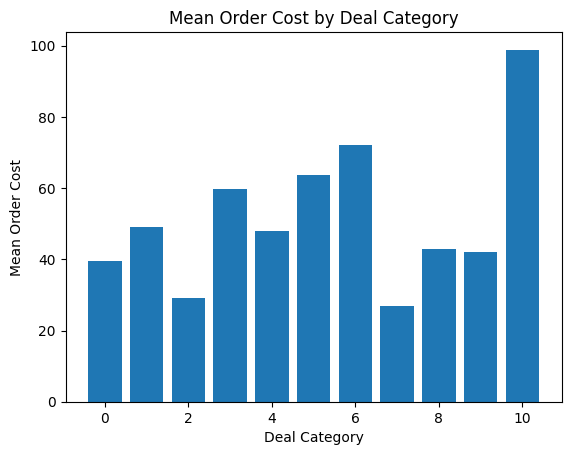

In [22]:
# Let's continue on and explore if there is a relationship between order cost and deal category.

plt.bar(clean_data['deal_category'].unique(), deal_cat_mean) # Plot the mean order cost for each category in a bar chart.
plt.xlabel('Deal Category') # Label the x axis.
plt.ylabel('Mean Order Cost') # Label the y axis.
plt.title('Mean Order Cost by Deal Category') # Title the plot.
plt.show() # Show the plot.

In [23]:
# Let's test the correlation between order cost and deal category using numpy's corrcoef function.
# Note that correlation does not imply causation and is a very basic test of the relationship between two variables.
# For more information on correlation, see https://en.wikipedia.org/wiki/Correlation_and_dependence.
# A value of 0 means no correlation, a value of 1 means perfect correlation, and a value of -1 means perfect negative correlation.

corr_value = np.corrcoef(clean_data['order_cost'], clean_data['deal_category']) # Find the correlation coefficient between order cost and deal category.
print(f"Correlation coefficient: {corr_value[0, 1]}") # Print the correlation coefficient, note that the corrcoef function returns a 2x2 matrix, so we need to index the value we want.

Correlation coefficient: 0.1653930115412223


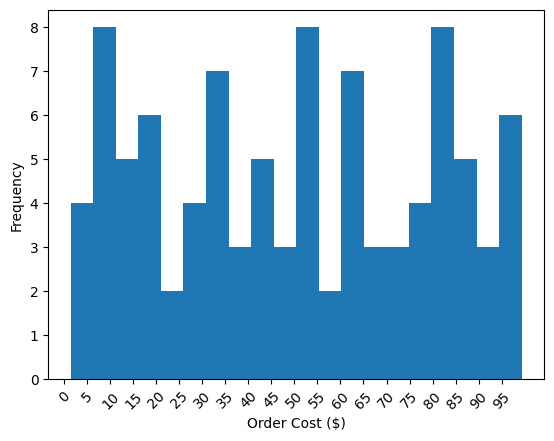

In [24]:
# Let's plot a histogram of the order_cost column, helping us to visualise the distribution of values across the orders.

plt.hist(clean_data['order_cost'], bins=20) # Plot a histogram of order_cost with 20 bins.
plt.xlabel('Order Cost ($)') # Set the x-axis label.
plt.ylabel('Frequency') # Set the y-axis label.
plt.xticks(rotation=45) # Rotate the x-axis labels by 45 degrees.
plt.xticks(np.arange(0, 100, 5)) # Set the x-axis ticks to be every 5 dollars, as we know the range of values is between 0 and 100 from our previous analysis.
plt.show() # Show the plot.

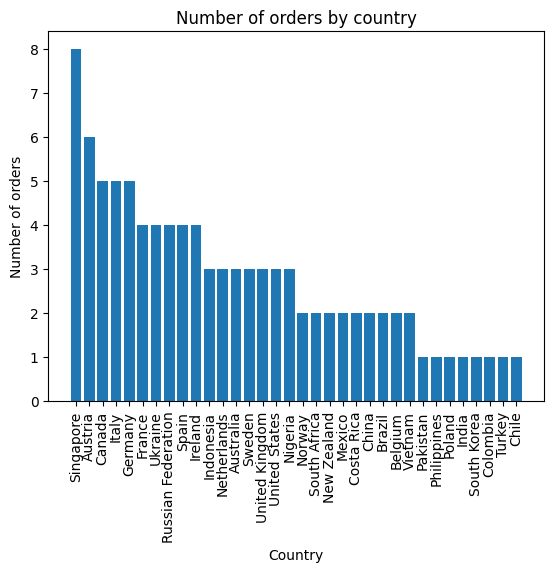

In [25]:
# Now let's explore the relationship between order_cost and country. 
# To being let's look at the number of orders from each country.

num_orders_country = clean_data['country'].value_counts() # Count the number of orders from each country.
plt.bar(num_orders_country.index, num_orders_country) # Plot a bar chart of the number of orders from each country.
plt.xlabel('Country') # Set the x-axis label
plt.ylabel('Number of orders') # Set the y-axis label
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
plt.title('Number of orders by country') # Set the title
plt.show() # Show the plot

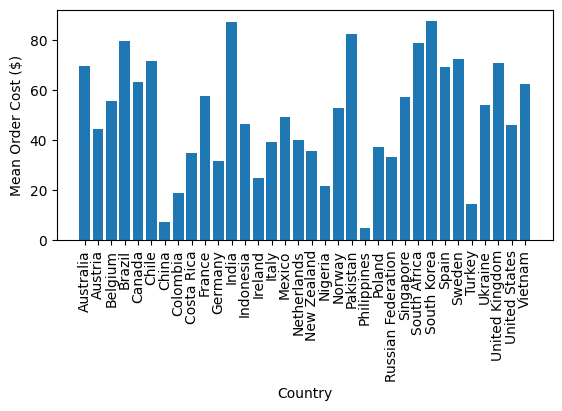

In [26]:
mean_order_per_country = clean_data.groupby('country')['order_cost'].mean() # Find the mean order_cost for each country
plt.bar(mean_order_per_country.index, mean_order_per_country) # Plot a bar chart of the mean order_cost for each country
plt.xlabel('Country') # Set the x-axis label
plt.ylabel('Mean Order Cost ($)') # Set the y-axis label
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.4) # Adjust the bottom of the plot to make room for the x-axis labels
plt.show() # Show the plot

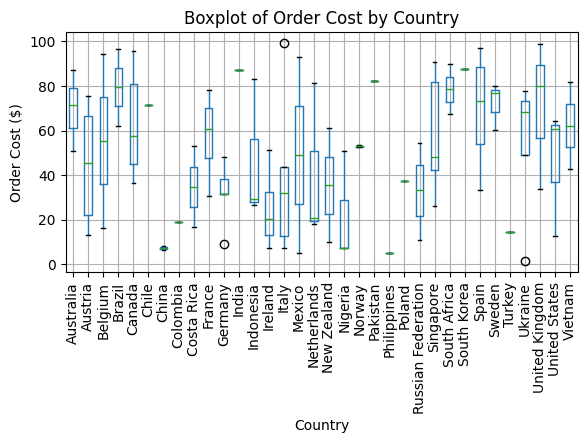

In [27]:
# Let's view the distribution of order_cost by country using a boxplot.
# A box plot shows the distribution of values for each category, as well as the median, interquartile range and outliers.
# In the below plot, the box represents the interquartile range, the line in the middle of the box is the median, the whiskers represent the range of values, and the dots are outliers.
# As some countries have a lot more orders than others, it is difficult to see the distribution of values for each country.

clean_data.boxplot(column='order_cost', by='country') # Plot a boxplot of order_cost by country
plt.ylabel('Order Cost ($)') # Set the y-axis label
plt.xlabel('Country') # Set the x-axis label
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees
plt.subplots_adjust(bottom=0.4) # Adjust the bottom of the plot to make room for the x-axis labels
plt.suptitle('') # Remove the default super-title
plt.title('Boxplot of Order Cost by Country') # Set the title of the plot
plt.show() # Show the plot

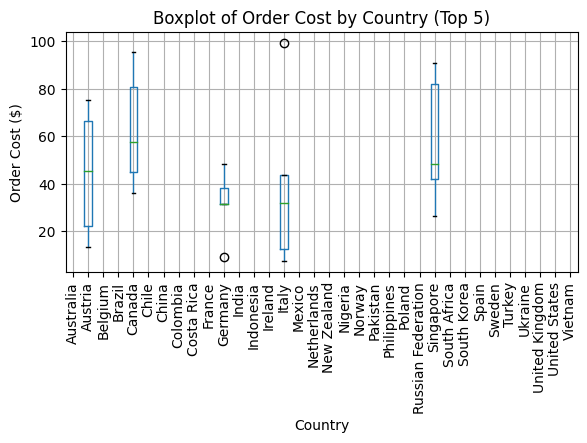

In [28]:
# Let's plot a boxplot of order_cost by country, but only for the top 5 countries by number of orders.
# This will allow us to see the distribution of values for each country more clearly, as the number of orders is more similar between countries.

top_5_countries = clean_data['country'].value_counts().index[:5] # Get the top 5 countries by number of orders using the index of the value_counts series and slicing.
clean_data_top_5 = clean_data.loc[clean_data['country'].isin(top_5_countries)] # Filter the data to only include the top 5 countries using pd.loc for a conditional selection and the isin function.
clean_data_top_5.boxplot(column='order_cost', by='country') # Plot a boxplot of order_cost by country.
plt.ylabel('Order Cost ($)') # Set the y-axis label.
plt.xlabel('Country') # Set the x-axis label.
plt.xticks(rotation=90) # Rotate the x-axis labels by 90 degrees.
plt.subplots_adjust(bottom=0.4) # Adjust the bottom of the plot to make room for the x-axis labels.
plt.suptitle('') # Remove the default super-title.
plt.title('Boxplot of Order Cost by Country (Top 5)') # Set the title of the plot.
plt.show() # Show the plot.